House Prices : Advanced Regression Techniques

Aim: Predict the sale price of a house


Features (80) :


MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2ndMasVnrType,MasVnrArea,ExterQualExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,Bedroom,Kitchen KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition

In [4]:
# import necessary libraries

import pandas as pd
import sys 
import numpy as np
import seaborn as sns
from math import sqrt
from pylab import rcParams
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge

from sklearn.ensemble import StackingRegressor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

**------------------------------------------------------- 1. LOADING & LOOKING AT THE DATA---------------------------------------------**

- The housing dataset is available on Kaggle under “House Prices: Advanced Regression Techniques”. The “train.csv” file contains the training data and “test.csv” contains the testing data. The training data contains data for 1460 rows which corresponds to 1460 house’s data and   80 columns which correspond to the feature of those houses. Similarly, the testing data contains data of 1461 houses and their 79 attributes. 

In [3]:
# load dataset 
import pandas as pd
csv_path = "train.csv"
df_train = pd.read_csv(r"C:\Users\niveb\OneDrive\Dokumenty\MCA project\train.csv")

csv_path = "test.csv"
df_test  = pd.read_csv(r"C:\Users\niveb\OneDrive\Dokumenty\MCA project\test.csv")


In [4]:
# check shape
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [5]:
# look a first 10 rows of training data
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [6]:
# look a first 10 rows of testing data
df_test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [7]:
# see all the column names
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

- There are 1459 rows and 80 columns
- There are columns with large number of null entries like PoolQC, MiscFeature etc
- The columns have Three types of datatypes:  float64(11), int64(26), object(43)

Looking at the label to predict 

In [10]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

- The average SalePrice of a house is 180,921
- The Maximum SalePrice of a house is 755,000 and Minimum 34,900

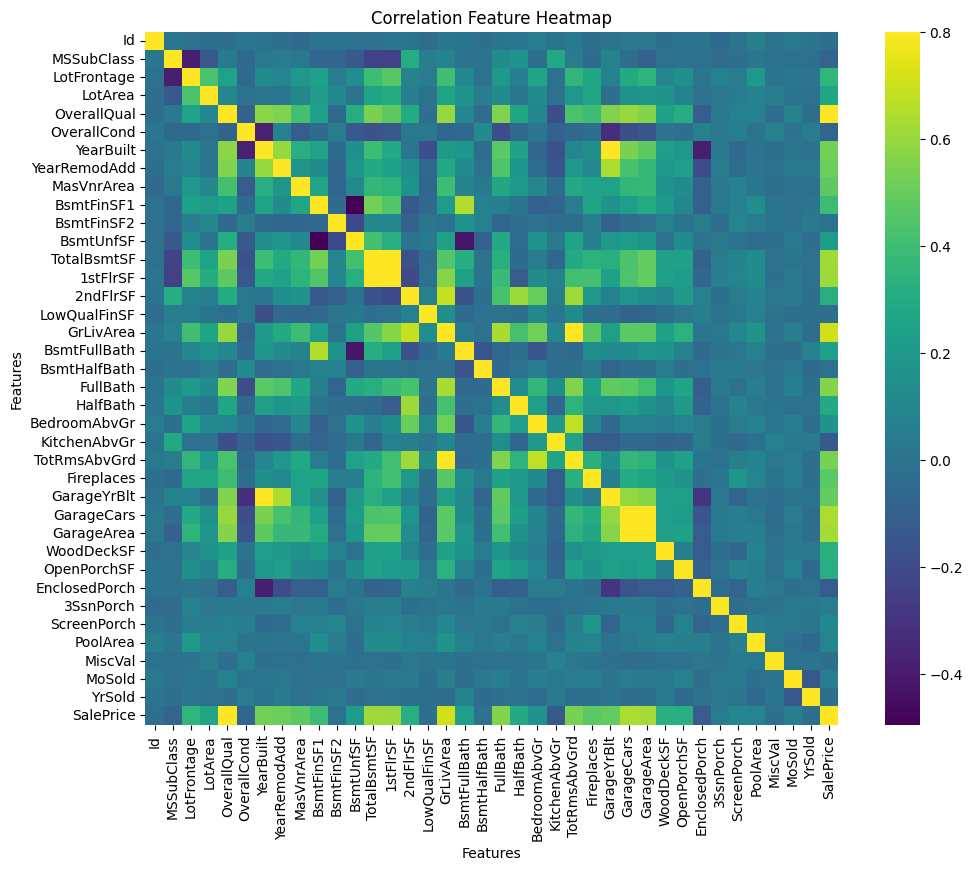

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# correlation matrix using only numeric variables
numeric_df = df_train.select_dtypes(include=['number'])

plt.figure(figsize=(12, 9))
sns.heatmap(numeric_df.corr(), vmax=.8, square=True, cmap="viridis")
plt.title("Correlation Feature Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()


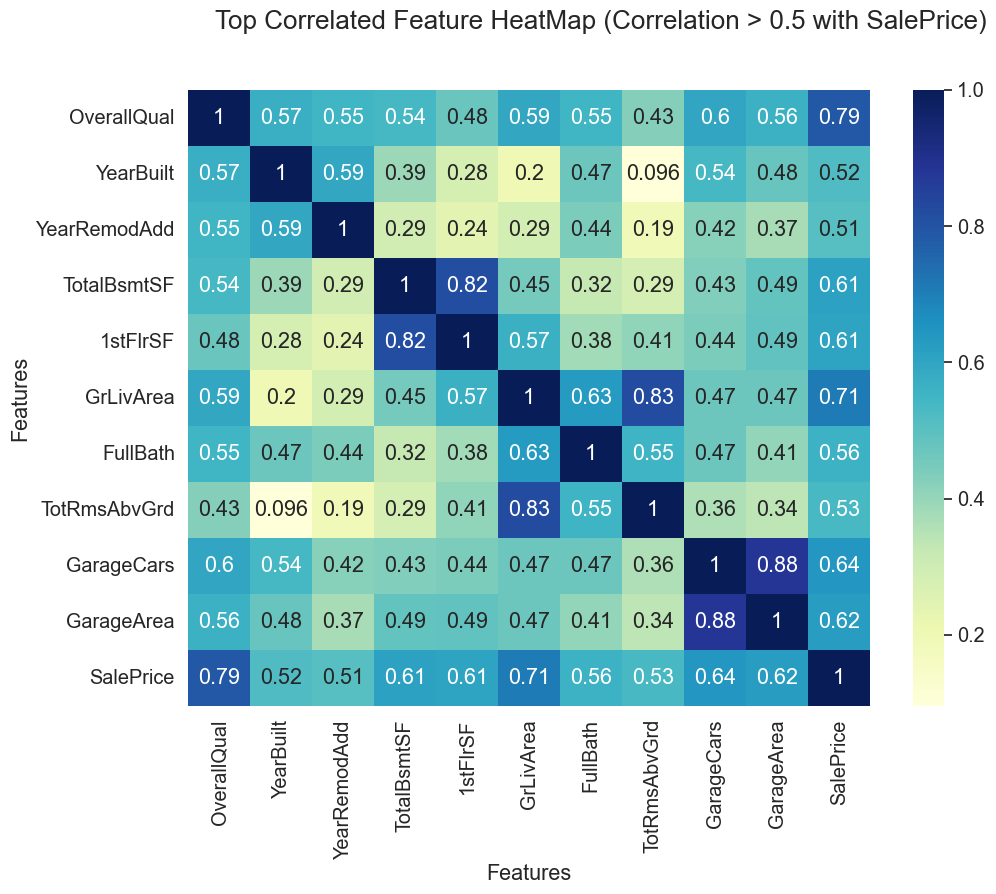

In [15]:

# Use only numeric columns
numeric_df = df_train.select_dtypes(include=['number'])

# correlation matrix
corr_mat = numeric_df.corr()

sns.set(font_scale = 1.3)
plt.figure(figsize = (11,8))

# Features with correlation > 0.5 with SalePrice
top_corr = corr_mat.index[abs(corr_mat["SalePrice"]) > 0.5]

# Heatmap of top correlated features
g = sns.heatmap(numeric_df[top_corr].corr(), annot=True, cmap="YlGnBu")

plt.suptitle("Top Correlated Feature HeatMap (Correlation > 0.5 with SalePrice)")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

- OverallQual and GrLivArea seem to be the most correlated to SalePrice

In [17]:

print("Correlation Values")

# keep only numeric columns
numeric_df = df_train.select_dtypes(include=['number'])

# compute correlation matrix
corr = numeric_df.corr().drop('SalePrice')

# sort by correlation with SalePrice
corr = corr.sort_values(by='SalePrice', ascending=False)

print(corr['SalePrice'])


Correlation Values
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dt

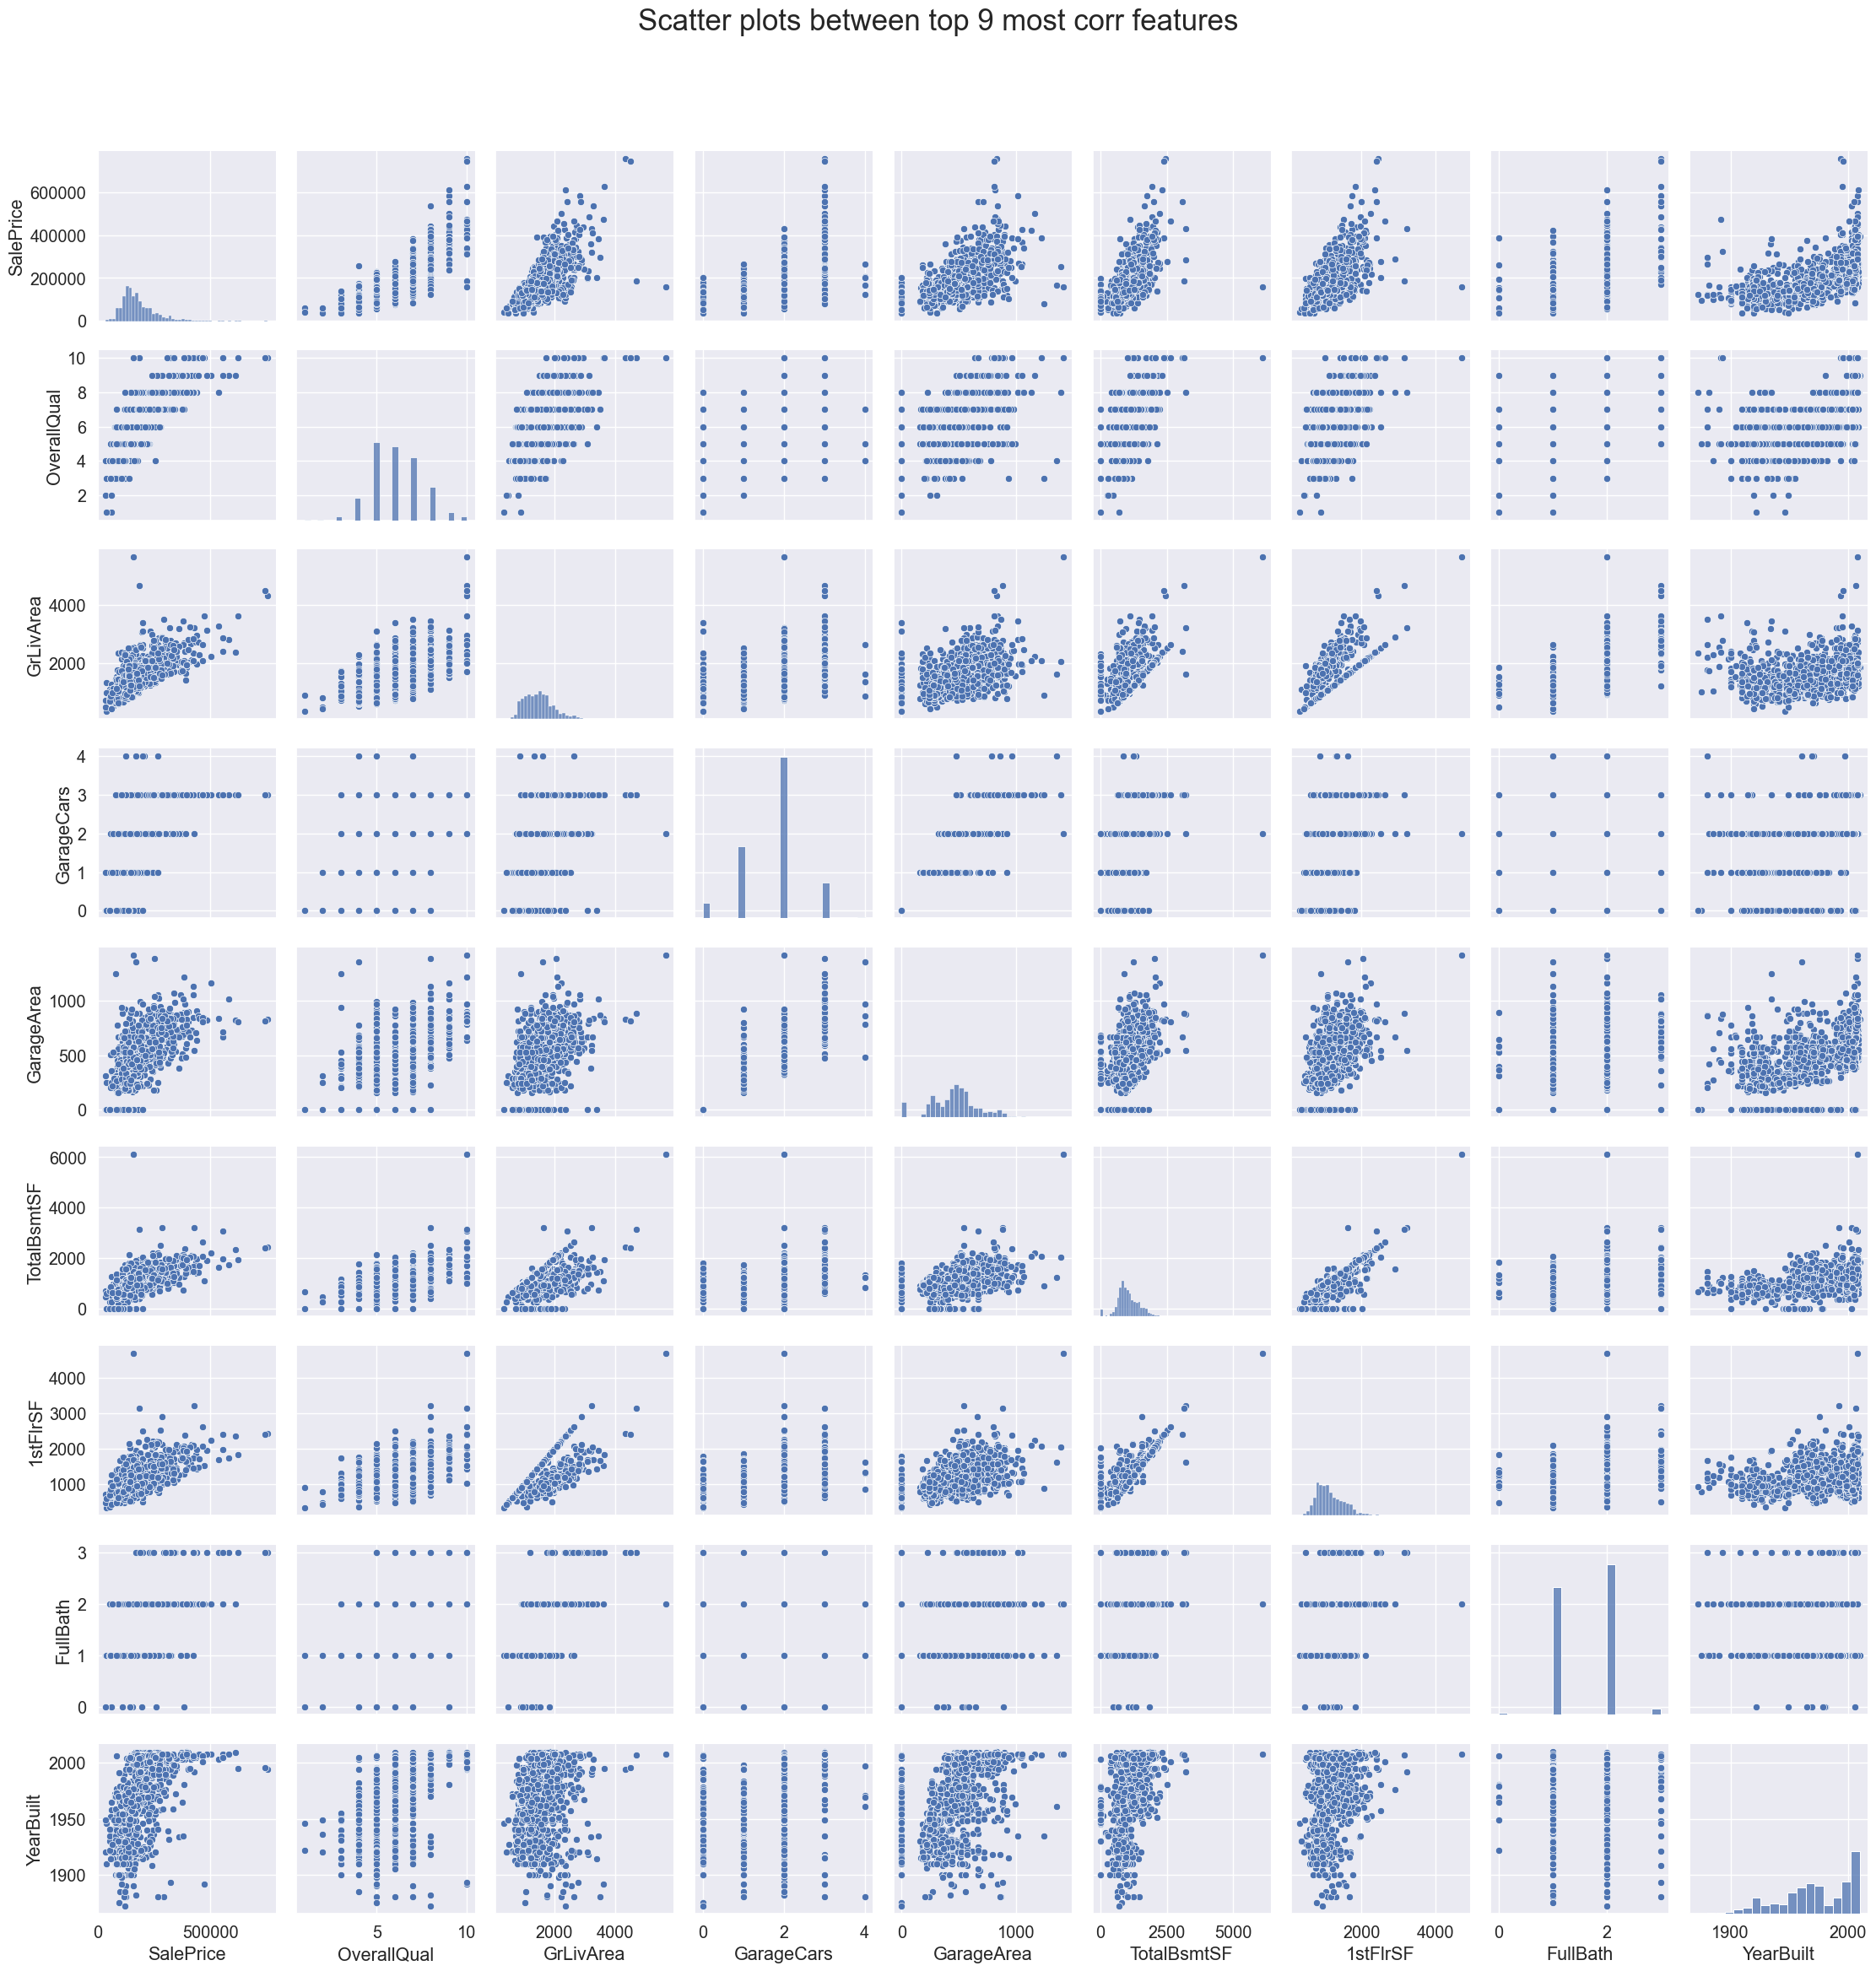

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set figure size using rcParams
rcParams['figure.figsize'] = (5, 5)

cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars',
        'GarageArea', 'TotalBsmtSF','1stFlrSF','FullBath','YearBuilt']

# Create pairplot
sns_plot = sns.pairplot(df_train[cols])

plt.suptitle('Scatter plots between top 9 most corr features', y=1.04, size=25)
plt.tight_layout()
plt.show()


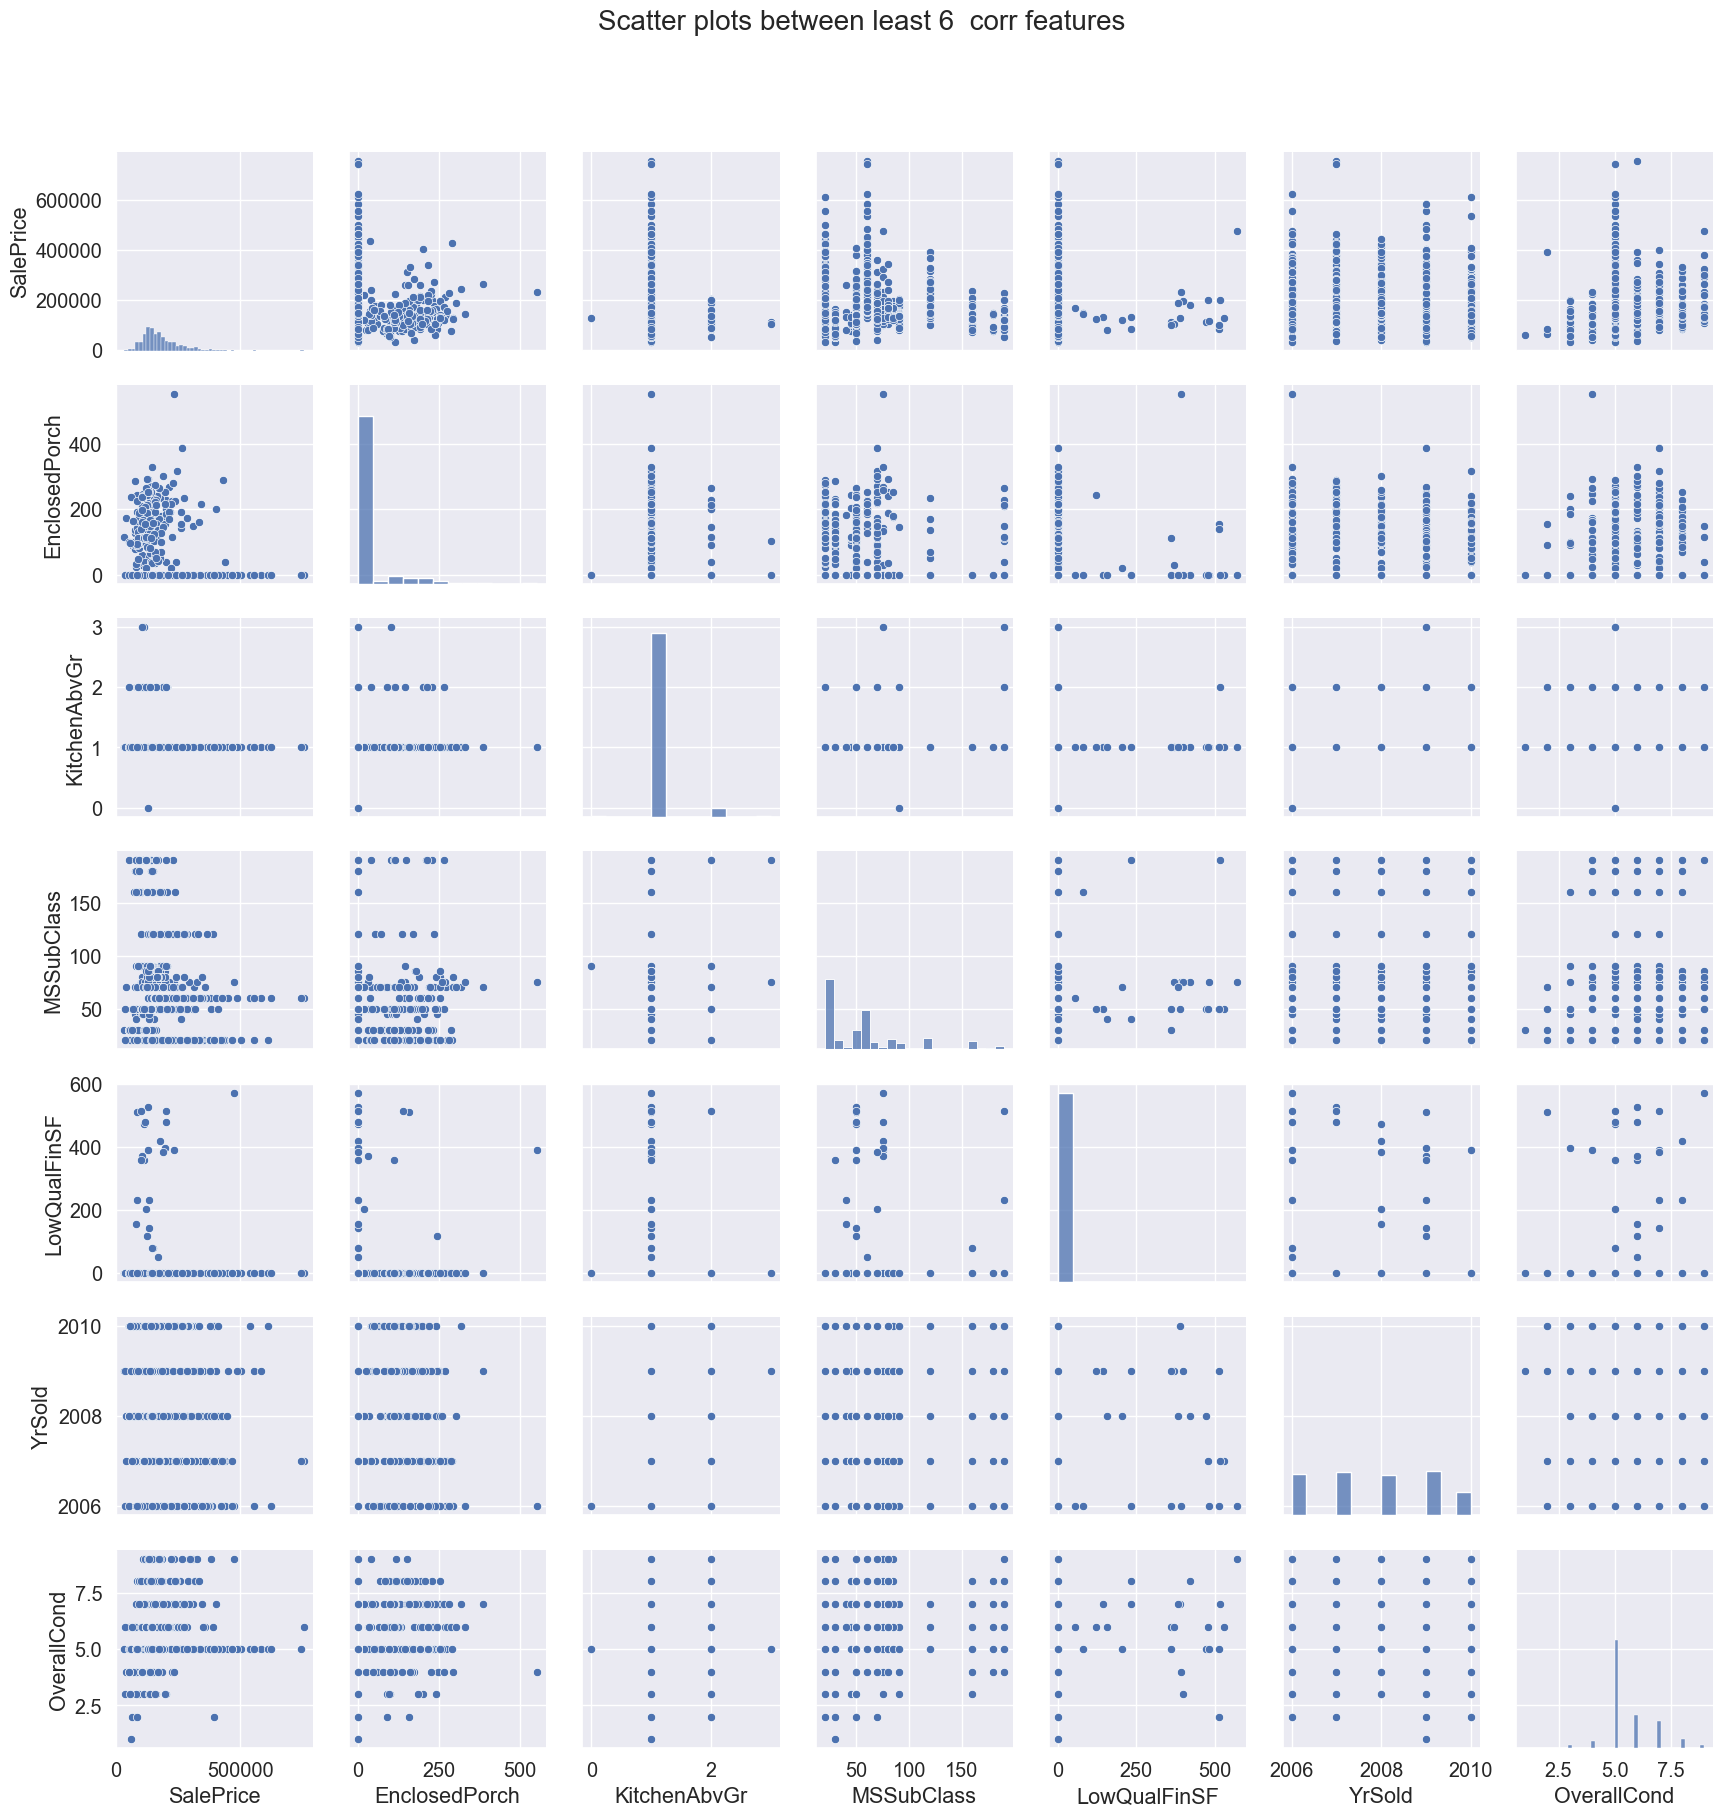

In [20]:
rcParams['figure.figsize'] = 5,5
cols = ['SalePrice','EnclosedPorch', 'KitchenAbvGr', 'MSSubClass', 'LowQualFinSF','YrSold', 'OverallCond']
sns_plot = sns.pairplot(df_train[cols])

plt.suptitle('Scatter plots between least 6  corr features', y=1.04, size=20)
plt.tight_layout()
plt.show()

#### ------------------------------------------------- 2. HANDLING DATA ------------------------------------------------------------

#### Drop Id Column

In [21]:
#drop id as it is not required for training or prediction
train_ID = df_train['Id']
test_ID = df_test['Id']

df_train.drop(['Id'], axis=1, inplace=True)
df_test.drop(['Id'], axis=1, inplace=True)

df_train.shape, df_test.shape

((1460, 80), (1459, 79))

#### Checking for Outliers

In [22]:
sns.set_style('whitegrid')
edgecolor = 'black'

fig = plt.figure(figsize=(12,12))

#function to plot scatter plot between a feature and the Sale Price 
def scatter_plot(a):
    fig, ax = plt.subplots()
    ax.scatter(x = df_train[a], y = df_train['SalePrice'], edgecolor=edgecolor)
    plt.ylabel('SalePrice', fontsize=12)
    plt.xlabel(a, fontsize=12)
    plt.suptitle("Scatter Plot of "+ a + " and SalePrice")
    plt.show()

<Figure size 1200x1200 with 0 Axes>

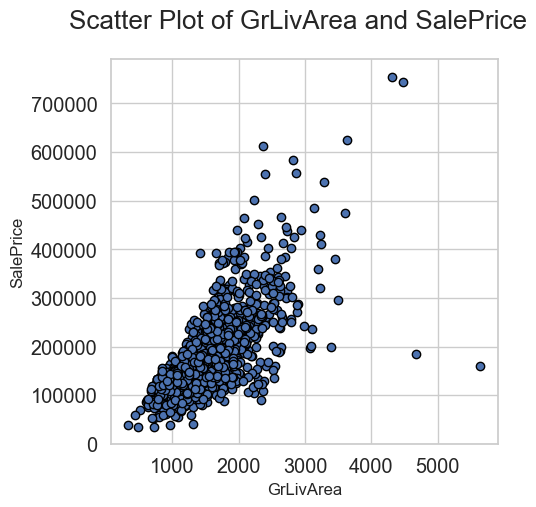

In [23]:
scatter_plot('GrLivArea')


- It can be observed that there are large outliers which can negatively affect the prediction of sale price highly
- So the outliers need to be deleted

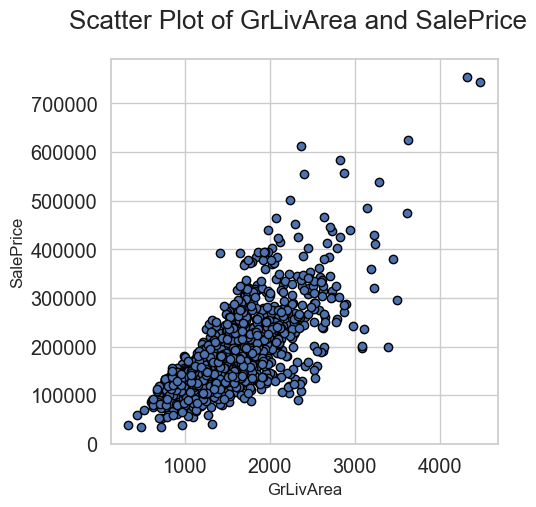

In [24]:
#Deleting outliers
df_train =  df_train.drop( df_train[( df_train['GrLivArea'] > 4000) & ( df_train['SalePrice']<300000)].index)

#Check the graphic again
scatter_plot('GrLivArea')

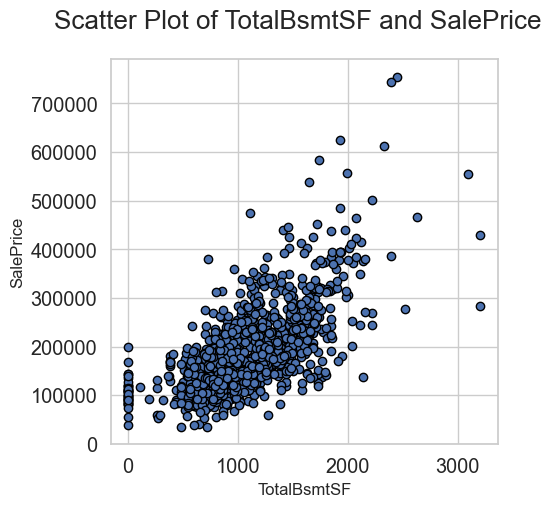

In [25]:
scatter_plot('TotalBsmtSF')

- There arent too large outliers, we do not need to delete any points

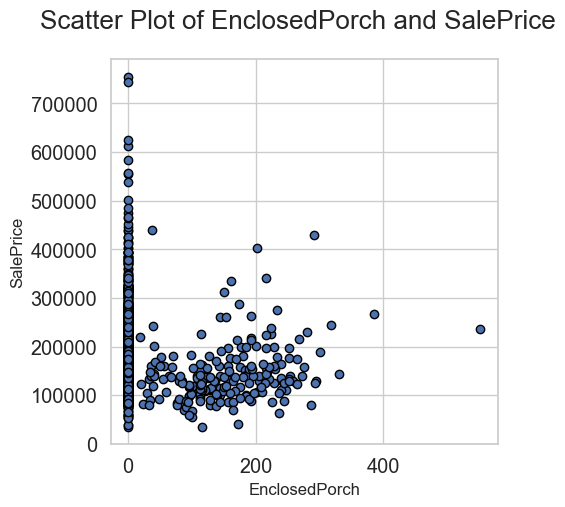

In [26]:
scatter_plot('EnclosedPorch')

- There is are some outliers that should be deleted so that it doesnt affect our predictions much

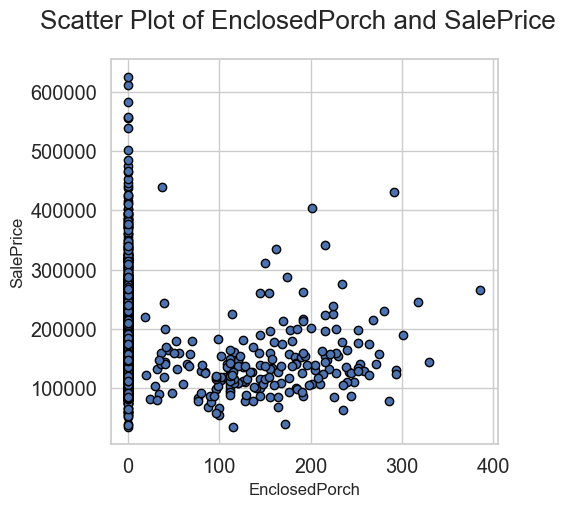

In [27]:
#Deleting outliers
df_train =  df_train.drop( df_train[( df_train['EnclosedPorch']>400)].index)

#Deleting outliers
df_train =  df_train.drop( df_train[( df_train['SalePrice']>700000)].index)

#check plot again
scatter_plot('EnclosedPorch')

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

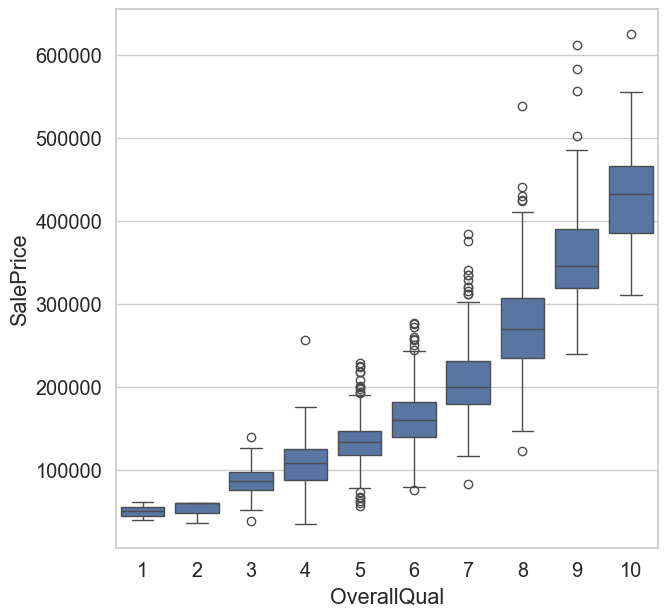

In [28]:

# plot a box plot for categorical feature : Overall Quality

fig = plt.figure(figsize=(7,7))
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
sns.boxplot(x = df_train['OverallQual'], y="SalePrice", data = data)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111],
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0,

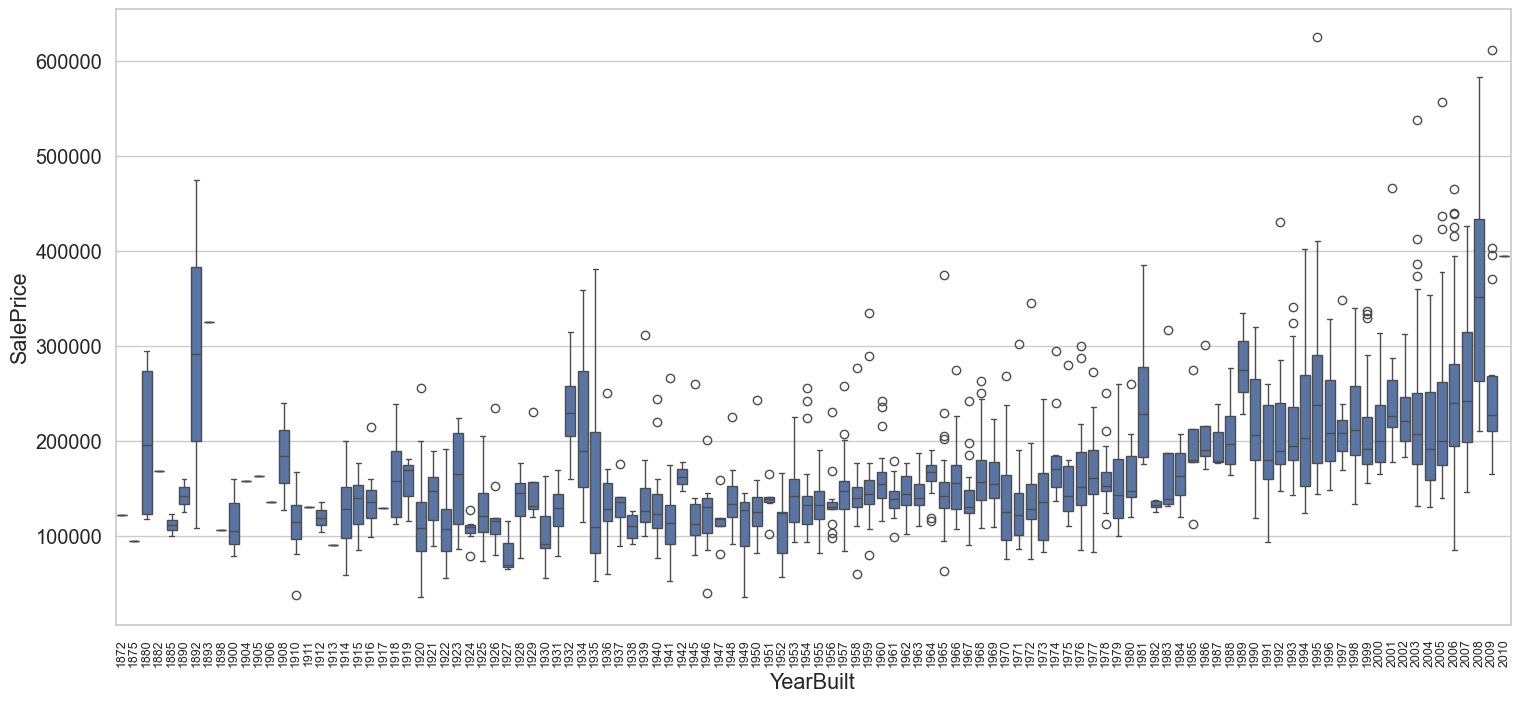

In [29]:
# plot a box plot for categorical feature : Year Built
fig = plt.figure(figsize=(18,8))

data = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)
sns.boxplot(x= df_train['YearBuilt'], y="SalePrice", data=data)
plt.xticks(rotation=90,fontsize= 9)

C:\Users\niveb\AppData\Local\Temp\ipykernel_49728\497540977.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'])


Skewness: 1.567473
Kurtosis: 3.888317


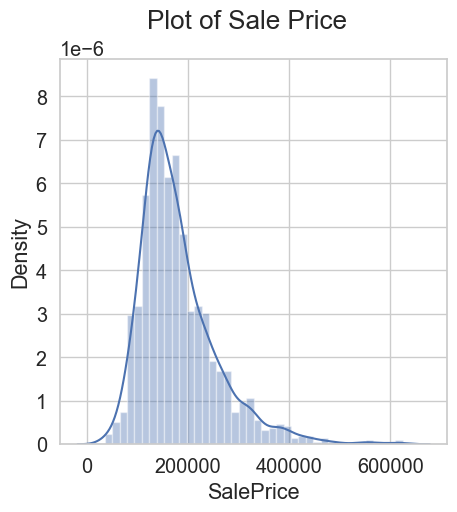

In [30]:
sns.distplot(df_train['SalePrice'])

plt.suptitle( "Plot of Sale Price")

print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

C:\Users\niveb\AppData\Local\Temp\ipykernel_49728\1621536966.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'])


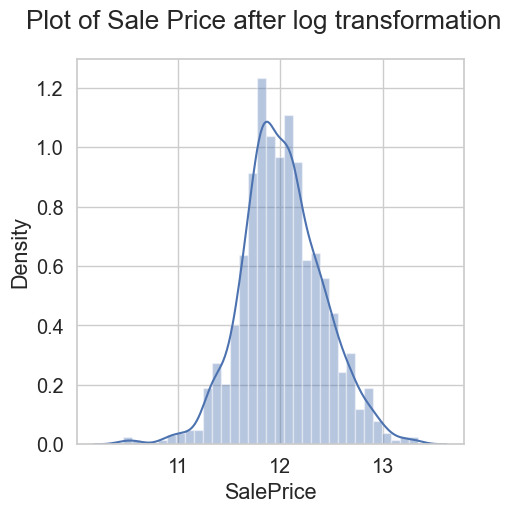

In [32]:
# applying log transformation to correct the positive skewness in the data
# taking logs means that errors in predicting expensive and cheap houses will affect the result equally
import numpy as np
df_train['SalePrice'] = np.log(df_train['SalePrice'])
plt.suptitle("Plot of Sale Price after log transformation")
sns.distplot(df_train['SalePrice'])
plt.show()

In [33]:
df_train['SalePrice'].describe()

count    1455.000000
mean       12.021706
std         0.396112
min        10.460242
25%        11.774520
50%        12.001505
75%        12.272562
max        13.345507
Name: SalePrice, dtype: float64

In [34]:
df_train['SalePrice']

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1455, dtype: float64

In [35]:
df_train.shape

(1455, 80)

#### Handling missing data

In [36]:
#function to see the missing data in a dataframe
def missing_data(df,n):    
    total = df.isnull().sum().sort_values(ascending=False)          # Total No of missing values
    percentage = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)*100  # % of Missing values
    No_unique_val = df.nunique()                                   # No of unique values
    missing_data = pd.concat([total, percentage, No_unique_val], axis=1, 
                             keys=['Total No of missing val', '% of Missing val','No of unique val'], sort = False)
    
    print(missing_data.head(n))

In [37]:
#training data    
missing_data(df_train,20)

              Total No of missing val  % of Missing val  No of unique val
PoolQC                           1451         99.725086                 2
MiscFeature                      1401         96.288660                 4
Alley                            1364         93.745704                 2
Fence                            1176         80.824742                 4
MasVnrType                        870         59.793814                 3
FireplaceQu                       690         47.422680                 5
LotFrontage                       259         17.800687               109
GarageQual                         81          5.567010                 5
GarageType                         81          5.567010                 6
GarageFinish                       81          5.567010                 3
GarageCond                         81          5.567010                 5
GarageYrBlt                        81          5.567010                97
BsmtExposure                       38 

In [38]:
df_train['PoolQC'].unique()

array([nan, 'Fa', 'Gd'], dtype=object)

- PoolQC,Alley have only two unique values
- PoolQC has 99.7% of missing data, which means most of the values are NA: No Pool ie most of the houses do not have a pool
- PoolQC,Alley,MiscFeature will be dropped due to large number of missing values

In [39]:
#test data 
missing_data(df_test,34)

              Total No of missing val  % of Missing val  No of unique val
PoolQC                           1456         99.794380                 2
MiscFeature                      1408         96.504455                 3
Alley                            1352         92.666210                 2
Fence                            1169         80.123372                 4
MasVnrType                        894         61.274846                 3
FireplaceQu                       730         50.034270                 5
LotFrontage                       227         15.558602               115
GarageCond                         78          5.346127                 5
GarageFinish                       78          5.346127                 3
GarageYrBlt                        78          5.346127                97
GarageQual                         78          5.346127                 4
GarageType                         76          5.209047                 6
BsmtCond                           45 

In [40]:
df_test['Utilities'].unique()

array(['AllPub', nan], dtype=object)

- all records mostly "AllPub" for Utilities

- PoolQC,Alley,MiscFeature will be dropped due to large number of missing values
- Utilities has only 1 unique value
- Utility will also be dropped

In [41]:
# calculate total number of null values in training data
null_train = df_train.isnull().sum().sum()
print(null_train)

# calculate total number of null values in test data
null_test = df_test.isnull().sum().sum()
print(null_test)

7812
7878
